In [45]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [46]:
#Read in the csv file and convert to a Pandas dataframe
football_df = pd.read_csv("Data\\footballl_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [47]:
pd.set_option('display.max_columns', None)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [48]:
football_df.shape

(10754, 22)

In [49]:
football_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [50]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 1. Reliability:


#### 2. Timeliness: 


*************************************
The data was collected for 2 season 2021-2022 and 2022-2023
*************************************

#### 3. Consistency: 



#### 4. Relevance: 



********************************************
The data was collected for several top-tier global football leagues (including Saudi pro league):
- **Asian:** leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.

- **European:** leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.

- **African:** league, namely the DStv Premiership in South Africa.

- **American:** leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.

#### 5. Uniqueness: 



In [51]:
football_df.duplicated().sum()

0

In [52]:
football_df[football_df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [53]:
# go to delete duplicates columns

#### 6. Completeness: 


In [54]:
#Display number missing values per column
football_df.isnull().sum()


player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [55]:
# go to clean them 

#### 7. Check Accuracy:


In [56]:
# check columns types 
football_df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [57]:
football_df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [58]:
football_df['position_encoded'].unique()

array([1, 2, 3, 4], dtype=int64)

In [59]:
football_df['winger'].unique()

array([0, 1], dtype=int64)

In [60]:
team_leagues = {
    "Premier League and Championship": [
        "Arsenal", "Aston Villa","Bournemouth",
        "Brentford","Brighton & Hove Albion","Burnley",
        "Chelsea","Crystal Palace","Everton",
        "Fulham","Liverpool","Luton Town",
        "Manchester City","Manchester United","Newcastle United",
        "Nottingham Forest","Sheffield United","Tottenham Hotspur",
        "West Ham United","Wolverhampton Wanderers","Birmingham City",
        "Blackburn Rovers","Bristol City","Cardiff City",
        "Coventry City","Huddersfield Town","Hull City","Ipswich Town",
        "Leeds United","Leicester City","Middlesbrough",
        "Millwall","Norwich City",
        "Plymouth Argyle","Preston North End","Queens Park Rangers",
        "Rotherham United","Sheffield Wednesday","Southampton",
        "Stoke City","Sunderland","Swansea City",
        "Watford","West Bromwich Albion", "Brighton &amp"
    ],
    
    "EFL":[
        "Reading FC", "Blackpool FC","Wigan Athletic",
    ],

    "Bundesliga": [
        "FC Augsburg","Union Berlin","VfL Bochum","Werder Bremen",
        "Borussia Dortmund","Eintracht Frankfurt","SC Freiburg",
        "1. FC Heidenheim","1899 Hoffenheim","1. FC Köln",
        "RB Leipzig","Bayer Leverkusen","Mainz 05",
        "Borussia Mönchengladbach","Bayern Munich","VfB Stuttgart",
        "VfL Wolfsburg","SV Darmstadt 98", "Hertha BSC",
        "SK Sturm Graz"
    ], 

    "La liga": [
        "Alavés","Athletic Bilbao","Atlético Madrid","Barcelona",
        "Cádiz","Celta Vigo","Getafe",
        "Girona","Granada","Las Palmas",
        "Mallorca","Osasuna","Rayo Vallecano",
        "Real Betis","Real Madrid","Real Sociedad","Sevilla",
        "Valencia","Villarreal","Almería","Celta de Vigo",
        "Real Valladolid CF","Elche CF", "Atlético de Madrid"
    ],

    "Serie A": [
        "Atalanta","Bologna","Cagliari",
        "Empoli","Fiorentina","Frosinone",
        "Genoa","Inter Milan","Juventus",
        "Lazio","Lecce","AC Milan",
        "Monza","Napoli","AS Roma",
        "Salernitana","Sassuolo","Torino",
        "Udinese","Hellas Verona","US Cremonese"
    ],
    "Serie B":[
        "UC Sampdoria","Spezia Calcio"
    ],

    "Ligue 1": [
        "AS Monaco","Clermont Foot","Le Havre",
        "Lens","Lille","Lorient",
        "Lyon","Marseille","Metz",
        "Montpellier","Nantes","Nice",
        "Paris Saint-Germain","Reims","Rennes",
        "Strasbourg","Toulouse","Troyes","Angers",
        "Ajaccio", "Stade Rennais FC", "Stade Brestois 29", "AJ Auxerre"
    ],

    "Eredivisie": [
        "Ajax","AZ Alkmaar","Excelsior",
        "Feyenoord","Fortuna Sittard","Go Ahead Eagles",
        "Heracles Almelo","Heerenveen","NEC Nijmegen",
        "PSV Eindhoven","RKC Waalwijk","Sparta Rotterdam",
        "FC Twente","FC Utrecht","Vitesse",
        "Volendam","PEC Zwolle","Almere City"
        "Twente Enschede FC", "FC Groningen", 'Twente Enschede FC'
    ],
    "Eerste Divisie":[
        "SC Cambuur Leeuwarden","FC Emmen"
    ],

    "Liga NOS": [
        "Benfica","Porto","Sporting CP",
        "Braga","Vitória de Guimarães","Boavista",
        "Marítimo","Santa Clara","Paços de Ferreira",
        "Gil Vicente","Tondela","Famalicão",
        "Belenenses","Moreirense","Estoril",
        "Portimonense","Arouca","Vizela",
        "Casa Pia AC", "Rio Ave FC", "GD Chaves"
    ],

    "Premier Liga": [
        "Akhmat Grozny","Baltika Kaliningrad","CSKA Moscow",
        "Dinamo Moscow","FK Krasnodar","Krylia Sovetov Samara",
        "Lokomotiv Moscow","Orenburg","PFC Sochi",
        "Rostov","Rubin Kazan","Spartak Moscow",
        "Ural Yekaterinburg","Ufa","Zenit Saint Petersburg",
        "Nizhny Novgorod", "Vitória Guimarães SC", "Dynamo Moscow",
        "Krylya Sovetov Samara","FC Sochi", "FC Pari Nizhniy Novgorod",
        'FK Khimki', 'Torpedo Moscow',
        'Fakel Voronezh', 'Zenit St. Petersburg'
    ],

    "Super Lig": [
        "Adana Demirspor","Alanyaspor","Antalyaspor",
        "Beşiktaş","Çaykur Rizespor","Fenerbahçe",
        "Galatasaray","Gaziantep","Hatayspor",
        "İstanbul Başakşehir","İstanbulspor","Kasımpaşa",
        "Kayserispor","Konyaspor","Samsunspor",
        "Sivasspor","Trabzonspor","MKE Ankaragücü",
        "Pendikspor","Ümrani,yespor", "Besiktas JK",
        "Basaksehir FK", "Kasimpasa",
        'Istanbulspor', 'Fatih Karagümrük', 'Ümraniyespor',
        'Fenerbahce',
    ],
    "TFF": [
        "Giresunspor"
    ],

    "Bundesliga": [
        "FC Augsburg","Union Berlin","VfL Bochum",
        "Werder Bremen","Borussia Dortmund","Eintracht Frankfurt",
        "SC Freiburg","1. FC Heidenheim","1899 Hoffenheim",
        "1. FC Köln","RB Leipzig", "Bayer Leverkusen",
        "Mainz 05","Borussia Mönchengladbach","Bayern Munich",
        "VfB Stuttgart","VfL Wolfsburg","SV Darmstadt 98",
        "1.FC Köln", "FC Schalke 04", "Bayer 04 Leverkusen",
        'LASK', 'SCR Altach',"SK Sturm Graz"
       'SC Austria Lustenau', "SV Ried",
       'TSV Hartberg', 'WSG Tirol','Rapid Vienna',
       'Austria Vienna', 'SK Austria Klagenfurt', 'Wolfsberger AC',
       'Red Bull Salzburg','Hertha BSC', 'SK Sturm Graz',
       'SC Austria Lustenau'
    ],
    ########################
    "Brasileiro":[
        "América Mineiro","Athletico Paranaense","Atlético Mineiro",
        "Bahia","Botafogo","Corinthians",
        "Coritiba","Cruzeiro","Cuiabá",
        "Flamengo","Fluminense","Fortaleza",
        "Goiás","Grêmio","Internacional",
        "Palmeiras","Red Bull Bragantino","Santos",
        "São Paulo","Vasco da Gama"
    ],
    "MLS":[
        "Atlanta United","Austin FC","Charlotte FC",
        "Chicago Fire","FC Cincinnati","Colorado Rapids",
        "Columbus Crew","D.C. United","FC Dallas",
        "Houston Dynamo","Sporting Kansas City","LA Galaxy",
        "Los Angeles FC","Inter Miami","Minnesota United",
        "CF Montréal","Nashville SC","New England Revolution",
        "New York City FC","New York Red Bulls","Orlando City",
        "Philadelphia Union","Portland Timbers","Real Salt Lake",
        "San Jose Earthquakes","Seattle Sounders","St. Louis City SC",
        "Toronto FC","Vancouver Whitecaps", 'Los Angeles Galaxy',
        'St. Louis CITY SC'
    ],
    "Primera División":[
        "Argentinos Juniors","Arsenal de Sarandí","Atlético Tucumán",
        "Banfield","Barracas Central","Belgrano",
        "Boca Juniors","Central Córdoba","Colón",
        "Defensa y Justicia","Estudiantes","Gimnasia y Esgrima",
        "Godoy Cruz","Huracán","Independiente",
        "Instituto","Lanús","Newell's Old Boys",
        "Platense","Racing Club","River Plate",
        "Rosario Central","San Lorenzo","Sarmiento",
        "Talleres","Tigre","Unión",
        "Vélez Sarsfield","Central Norte","Deportivo Morón",
        'CA Colon'
    ],

    "Liga MX":[
        "América","Atlas","Atlético San Luis",
        "Cruz Azul","FC Juárez","Guadalajara",
        "León","Mazatlán","Monterrey",
        "Necaxa","Pachuca","Puebla",
        "Querétaro","Santos Laguna","Tijuana",
        "Toluca","Tigres UANL","UNAM"
        "Atlético de San Luis", 'Atlético de San Luis', 'UNAM Pumas'
    ],
    #################################
    "DStv":[
        "AmaZulu","Cape Town City","Chippa United",
        "Golden Arrows","Kaizer Chiefs","Lamontville Golden Arrows",
        "Mamelodi Sundowns", "Maritzburg United", "Marumo Gallants",
        "Orlando Pirates","Richards Bay","Royal AM",
        "Sekhukhune United","Stellenbosch","SuperSport United",
        "Swallows FC","TS Galaxy"
    ],
    #################################
    "J-League":[
        "Albirex Niigata","Avispa Fukuoka","Cerezo Osaka",
        "FC Tokyo","Gamba Osaka","Hokkaido Consadole Sapporo",
        "Kashima Antlers", "Kashiwa Reysol","Kawasaki Frontale",
        "Kyoto Sanga","Nagoya Grampus","Sagan Tosu",
        "Sanfrecce Hiroshima","Shonan Bellmare","Urawa Red Diamonds",
        "Vissel Kobe","Yokohama FC","Yokohama F. Marinos"
    ],
    "Saudi Pro League":[
        "Al-Ahli","Al-Adalah","Al-Batin",
        "Al-Ettifaq","Al-Faisaly","Al-Fateh",
        "Al-Fayha","Al-Hazem","Al-Hilal",
        "Al-Ittihad","Al-Khaleej","Al-Nassr",
        "Al-Raed","Al-Shabab","Damac",
        "Abha","Al-Wehda","Al-Taawoun",
        'Ettifaq FC', 'Al-Tai'
    ],
    "K-League":[
        "Daegu FC","Daejeon Hana Citizen","FC Seoul",
        "Gangwon FC","Gwangju FC","Incheon United",
        "Jeju United","Jeonbuk Hyundai Motors","Pohang Steelers",
        "Suwon FC","Suwon Samsung Bluewings","Ulsan Hyundai"
    ],
    "A-League":[
        "Adelaide United","Brisbane Roar","Central Coast Mariners",
        "Macarthur FC","Melbourne City","Melbourne Victory",
        "Newcastle Jets","Perth Glory","Sydney FC",
        "Wellington Phoenix", "Western Sydney Wanderers","Western United"
    ]
}

In [61]:
def get_league(t):
    for league, teams_list in team_leagues.items():
        for team in teams_list:
            if team in t:
                return league
    
    return "Unknown"

In [62]:
football_df["league"] = football_df["team"].map(get_league)

In [63]:
football_df[football_df['league'] == "Unknown"]["team"].unique()

array([], dtype=object)

In [64]:
football_df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger', 'league'],
      dtype='object')

In [65]:
# go to clean them 
categorical_features = ['team', 'position', 'position_encoded', 'winger', 'league']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
                    'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value']

In [66]:
pd.set_option('display.max_rows', None)

In [67]:
# check outliers 
for i in categorical_features:
    print (football_df[i].value_counts())

team
Daejeon Hana Citizen                   46
Jeonbuk Hyundai Motors                 46
FC Seoul                               45
Gangwon FC                             43
Daegu FC                               42
Al-Batin FC                            41
Santos FC                              40
Swallows FC                            40
Sagan Tosu                             40
Royal AM FC                            40
Marumo Gallants FC                     39
Vissel Kobe                            39
Botafogo de Futebol e Regatas          38
Incheon United                         38
Suwon Samsung Bluewings                38
Mamelodi Sundowns FC                   38
São Paulo Futebol Clube                37
Kashiwa Reysol                         37
Yokohama FC                            37
FC Tokyo                               37
Kyoto Sanga                            37
Cerezo Osaka                           37
Yokohama F. Marinos                    37
Al-Taawoun FC                

In [68]:
original_football_df = football_df.copy()

In [69]:
football_df[football_df['current_value'] > 100000000]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,league
450,/phil-foden/profil/spieler/406635,Manchester City,Phil Foden,Attack-LeftWinger,171.0,23.0,93,0.446612,0.292608,0.077002,0.0,0.000000,0.0,0.0,5844,121,23,15,110000000,110000000,4,1,Premier League and Championship
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,Attack Centre-Forward,195.0,22.0,83,1.118270,0.234699,0.124252,0.0,0.000000,0.0,0.0,6519,204,36,17,170000000,170000000,4,0,Premier League and Championship
474,/bukayo-saka/profil/spieler/433177,Arsenal FC,Bukayo Saka,Attack-RightWinger,178.0,21.0,91,0.342109,0.228073,0.164719,0.0,0.000000,0.0,0.0,7103,27,2,2,110000000,110000000,4,1,Premier League and Championship
960,/jude-bellingham/profil/spieler/581678,Borussia Dortmund,Jude Bellingham,midfield-CentralMidfield,186.0,19.0,86,0.244798,0.257038,0.269278,0.0,0.000000,0.0,0.0,7353,19,4,2,120000000,120000000,3,0,Bundesliga
1017,/jamal-musiala/profil/spieler/580195,Bayern Munich,Jamal Musiala,midfield-AttackingMidfield,184.0,20.0,87,0.431655,0.395683,0.071942,0.0,0.000000,0.0,0.0,5004,66,6,11,110000000,110000000,3,0,Bundesliga
1521,/vinicius-junior/profil/spieler/371998,Real Madrid,Vinicius Junior,Attack-LeftWinger,176.0,22.0,107,0.448356,0.408502,0.229160,0.0,0.009963,0.0,0.0,9033,70,12,12,150000000,150000000,4,1,La liga
2644,/kylian-mbappe/profil/spieler/342229,Paris Saint-Germain,Kylian Mbappé,Attack Centre-Forward,178.0,24.0,89,0.963082,0.433387,0.204655,0.0,0.000000,0.0,0.0,7476,139,23,37,180000000,200000000,4,0,Ligue 1


In [70]:
#############################
#it gives bad results
# football_df = football_df[football_df['current_value'] <= 20000000]

In [71]:
#######################
#it gives bad results
# football_df = football_df[football_df['highest_value'] <= 50000000]

In [72]:
football_df = football_df[football_df['goals'] < 1.5]

In [73]:
football_df = football_df[(football_df['height'] >= 165) & (football_df['height'] <= 200)]

In [74]:
football_df = football_df[(football_df['age'] > 16) & (football_df['age'] < 40)]

In [75]:
football_df = football_df[football_df['assists'] < 1]

In [76]:
football_df = football_df[football_df['yellow cards'] < 0.475]

In [77]:
football_df = football_df[football_df['second yellow cards'] < 0.1]

In [78]:
football_df = football_df[football_df['red cards'] < 0.1]

In [79]:
football_df = football_df[football_df['goals conceded'] <= 2]

In [80]:
football_df = football_df[football_df['games_injured'] < 80]

In [81]:

football_df[football_df['award'] > 40]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,league
1507,/david-alaba/profil/spieler/59016,Real Madrid,David Alaba,Defender Centre-Back,180.0,30.0,85,0.063649,0.089109,0.101839,0.000000,0.0,0.0,0.0,7070,123,26,43,40000000,65000000,2,0,La liga
1525,/karim-benzema/profil/spieler/18922,Real Madrid,Karim Benzema,Attack Centre-Forward,185.0,35.0,89,0.894040,0.250331,0.023841,0.000000,0.0,0.0,0.0,7550,156,26,53,25000000,60000000,4,0,La liga
1549,/robert-lewandowski/profil/spieler/38253,FC Barcelona,Robert Lewandowski,Attack Centre-Forward,185.0,34.0,92,0.938442,0.169598,0.067839,0.011307,0.0,0.0,0.0,7960,139,22,65,30000000,90000000,4,0,La liga
2643,/lionel-messi/profil/spieler/28003,Paris Saint-Germain,Lionel Messi,Attack-RightWinger,170.0,35.0,75,0.442464,0.483945,0.013827,0.000000,0.0,0.0,0.0,6509,167,30,92,45000000,180000000,4,1,Ligue 1
8682,/andres-iniesta/profil/spieler/7600,Vissel Kobe,Andrés Iniesta,midfield-CentralMidfield,171.0,39.0,4,0.588235,0.000000,0.000000,0.000000,0.0,0.0,0.0,153,315,51,42,1200000,70000000,3,0,J-League
9433,/cristiano-ronaldo/profil/spieler/8198,Al-Nassr FC,Cristiano Ronaldo,Attack Centre-Forward,187.0,38.0,74,0.617780,0.105475,0.256153,0.000000,0.0,0.0,0.0,5973,168,27,90,15000000,120000000,4,0,Saudi Pro League


In [82]:
football_df[football_df['minutes played'] > 9000]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,league
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,Premier League and Championship
22,/bruno-fernandes/profil/spieler/240306,Manchester United,Bruno Fernandes,midfield-AttackingMidfield,179.0,28.0,105,0.239335,0.289197,0.219391,0.0,0.000000,0.000000,0.000000,9025,14,2,11,75000000,90000000,3,0,Premier League and Championship
372,/alisson/profil/spieler/105470,Liverpool FC,Alisson,Goalkeeper,193.0,30.0,101,0.000000,0.000000,0.009868,0.0,0.000000,0.986842,0.434211,9120,216,28,7,45000000,90000000,1,0,Premier League and Championship
1504,/thibaut-courtois/profil/spieler/108390,Real Madrid,Thibaut Courtois,Goalkeeper,200.0,31.0,101,0.000000,0.000000,0.019481,0.0,0.000000,0.925325,0.379870,9240,183,24,18,45000000,75000000,1,0,La liga
1521,/vinicius-junior/profil/spieler/371998,Real Madrid,Vinicius Junior,Attack-LeftWinger,176.0,22.0,107,0.448356,0.408502,0.229160,0.0,0.009963,0.000000,0.000000,9033,70,12,12,150000000,150000000,4,1,La liga
1550,/rui-patricio/profil/spieler/45026,AS Roma,Rui Patrício,Goalkeeper,190.0,35.0,105,0.000000,0.000000,0.075710,0.0,0.000000,1.003155,0.397476,9510,75,9,8,5000000,20000000,1,0,Serie A
4279,/odysseas-vlachodimos/profil/spieler/124419,SL Benfica,Odysseas Vlachodimos,Goalkeeper,191.0,29.0,102,0.000000,0.000000,0.058645,0.0,0.000000,0.879670,0.449609,9208,54,8,4,16000000,18000000,1,0,Liga NOS


In [83]:
filtered_football_df = football_df.copy()

In [84]:
football_df.shape

(9650, 23)

## 2. Data Cleaning: 





In [85]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [86]:
# go back to 7th dimension Accuracy 

## 3. Univariate Analysis: 



In [87]:
football_df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,league
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,Premier League and Championship


In [88]:
fig = px.box(football_df, y="current_value")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = make_subplots(rows=2, subplot_titles=("current_value 1", "highest_value 2"))

current_v_hist = px.histogram(football_df, x="current_value")
highest_v_hist = px.histogram(football_df, x='highest_value')


fig.add_trace(current_v_hist.data[0], row=1, col=1)
fig.add_trace(highest_v_hist.data[0], row=2, col=1)

fig.show()

In [ ]:
fig = px.histogram(football_df, x='goals')
fig.update_layout(
    width=1400,
    height=600 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='assists')
fig.update_layout(
    width=1400,
    height=600 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='goals conceded')
fig.update_layout(
    width=1400,
    height=600 
)
fig.show()

In [ ]:

fig = px.histogram(football_df, x='age')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='height')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='appearance')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='yellow cards')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='second yellow cards')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='red cards')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='games_injured')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='award')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [ ]:
fig = px.histogram(football_df, x='minutes played')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

#### 2. Feature engineering


In [89]:
football_df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,league
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,Premier League and Championship


In [90]:
categorical_features

['team', 'position', 'position_encoded', 'winger', 'league']

In [91]:
ml_df = football_df.copy()

In [92]:
# one hot coding
ml_df = pd.get_dummies(ml_df, columns=categorical_features)

In [93]:
ml_df.shape

(9650, 436)

In [94]:
ml_df = ml_df.drop(columns=['player', 'name'])

In [95]:
# Calculate the 35th and 75th percentiles of the price
p50 = ml_df['current_value'].quantile(0.5)
p85 = ml_df['current_value'].quantile(0.85)

# Function to categorize prices
def categorize_value(value):
    if value < p50:
        return 'Cheap_Value'
    elif value < p85:
        return 'Good_Value'
    else:
        return 'High_Value'

# Apply the function to create a new column
ml_df['current_value_category'] = ml_df['current_value'].apply(categorize_value)

ml_df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(ml_df['current_value_category'].value_counts())

current_value_category
Cheap_Value    4623
Good_Value     3553
High_Value     1474
Name: count, dtype: int64


In [96]:
p50, p85

(800000.0, 6000000.0)

In [97]:
#encode the current value categories 
encoder = LabelEncoder()
ml_df['current_value_category_encoded'] = encoder.fit_transform(ml_df['current_value_category']) 

#### 3. Feature selection

In [98]:
correlation = ml_df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded              1.000000
highest_value                               0.571266
appearance                                  0.551463
minutes played                              0.523670
award                                       0.261711
games_injured                               0.256505
league_Premier League and Championship      0.251721
assists                                     0.249848
days_injured                                0.215383
league_La liga                              0.206720
goals                                       0.191181
league_Serie A                              0.186621
yellow cards                                0.159444
league_Ligue 1                              0.142853
team_Chelsea FC                             0.095243
team_Southampton FC                         0.091517
team_Arsenal FC                             0.084476
team_Manchester United                      0.084212
team_Liverpool FC                           0.

In [99]:
# Set the correlation threshold
threshold = 0.16  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value', 'league_DStv',
       'league_K-League', 'league_La liga',
       'league_Premier League and Championship', 'league_Serie A',
       'current_value_category_encoded'],
      dtype='object')

In [100]:
# selected_features =['appearance', 'goals', 'assists', 'minutes played', 'games_injured',
#        'award', 'current_value', 'team_Arsenal FC',
#        'team_Bayern Munich', 'team_Chelsea FC', 'team_FC Barcelona',
#        'team_Manchester City', 'team_Paris Saint-Germain', 'team_Real Madrid',
#        'league_Premier League and Championship']

In [101]:
ml_df = ml_df[selected_features]
ml_df.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,highest_value,league_DStv,league_K-League,league_La liga,league_Premier League and Championship,league_Serie A,current_value_category_encoded
0,104,0.000000,0.000000,9390,42,5,13,70000000,False,False,False,True,False,2
1,15,0.000000,0.000000,1304,510,58,1,22000000,False,False,False,True,False,1
3,82,0.028090,0.056180,6408,175,22,9,50000000,False,False,False,True,False,2
4,63,0.017889,0.017889,5031,238,51,21,80000000,False,False,False,True,False,2
5,68,0.037799,0.000000,4762,148,27,1,70000000,False,False,False,True,False,2


#### 4. Prepare train and test data

In [102]:
# Prepare data
X = ml_df.drop(['current_value_category_encoded'], axis=1)
y = ml_df['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X.shape

(9650, 13)

## Buliding the Model

In [104]:
knn_classifier = KNeighborsClassifier()

In [105]:
param_grid = {
    'n_neighbors': [2,3,4,5,6,7,8]
}
grid_search = GridSearchCV(estimator=knn_classifier,
                           param_grid=param_grid,
                           cv=5,
                        #    scoring='f1_macro', 
                           verbose=10,
                           n_jobs=-1)

## Train the Model

In [106]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}, verbose=10)

In [107]:
grid_search.best_params_

{'n_neighbors': 7}

In [108]:
knn_model = grid_search.best_estimator_

## Test the Model

In [109]:
# Predict and evaluate the model
y_pred = knn_model.predict(X_test_scaled)

## Interpretation of the Model

In [110]:
# coeff_df = pd.DataFrame(best_rf.coef_, columns=X.columns)
# coeff_df.index = [f'Class_{i}' for i in range(coeff_df.shape[0])]

# # Display the DataFrame
# coeff_df

In [111]:
# best_rf.coef_

In [112]:
# print(best_rf.intercept_) 

## Evaluating the Model 

In [113]:
# our benchmark model
base_model = round(ml_df['current_value_category_encoded'].value_counts()[1]/ml_df.shape[0]*100, 2)
base_model

36.82

2. Confusion matrix

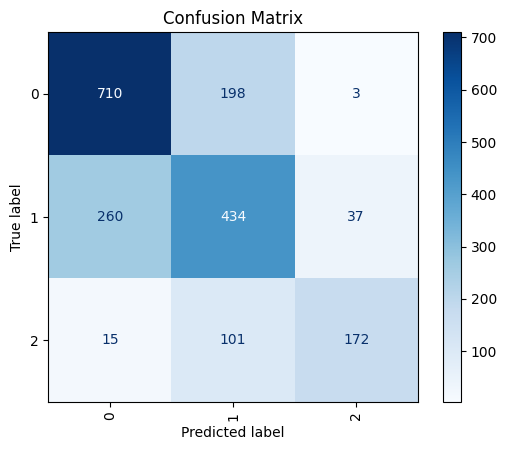

In [114]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=knn_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision 

In [115]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.71


4. Recall

In [116]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.66


5. F1 Score

In [117]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.68


# My insights 
- The model isn't great needs more revisions, if there was league name column that will help a lot since every football league bay different prices for players due to league competition.

- My colleagues suggested that to separate the model into multiple models where each one of them will have different players based on their position, since the goalkeeper doesn't score that much goals which is normal, but his price shouldn't be affected by it.
